Перевод в систему исчисления и обратно

In [3]:
bin(289)[2:]

'100100001'

In [2]:
hex(289)[2:]

'121'

In [6]:
int('100100001', base=2)

289

In [7]:
int('121', base=16)

289

In [28]:
# вернуть фильм с наименьшей средней оценкой
films = {'Spider-Man: No Way Home': {'imdb': 8.8, 'kinopoisk': 8.3},
         'Don"t Look Up': {'imdb': 7.3, 'kinopoisk': 7.6},
         'Encanto': {'imdb': 7.3, 'kinopoisk': 7.4},
         'The Witcher': {'imdb': 8.2, 'kinopoisk': 7.3},
         'Ghostbusters: Afterlife': {'imdb': 7.3, 'kinopoisk': 8},
         'Harry Potter 20th Anniversary: Return to Hogwarts': {'imdb': 8.1, 'kinopoisk': 8.2},
         'Shingeki no Kyojin': {'imdb': 9.0, 'kinopoisk': 8.3},
         'The Matrix': {'imdb': 8.7, 'kinopoisk': 8.5},
         'The Dark Knight': {'imdb': 9.0, 'kinopoisk': 8.5},
         'The Shawshank Redemption': {'imdb': 9.3, 'kinopoisk': 9.1},
         'Avengers: Endgame': {'imdb': 8.4, 'kinopoisk': 7.7}}

import numpy as np
print(min(films.items(), 
          key= lambda x: np.mean(list(x[1].values())))[0])

Encanto


In [31]:
numbers = [1,2,3,45,9]
all([num>=0 for num in numbers])

True

In [34]:
list(enumerate('123', start=1))

[(1, '1'), (2, '2'), (3, '3')]

        Функция zip_longest()
        Как уже известно, функция zip() объединяет элементы различных последовательностей. Особенностью функции является то, что при передаче последовательностей различной длины элементы последовательности большей длины будут отброшены.

        Реализуйте функцию zip_longest(), которая принимает переменное количество позиционных аргументов, каждый из которых является списком, и один необязательный именованный аргумент fill, имеющий значение по умолчанию None.

        Функция должна объединять элементы переданных последовательностей в кортежи, аналогично функции zip(), и возвращать в виде списка, но если последовательности имеют различную длину, недостающие элементы последовательностей меньшей длины должны принимать значение fill.

In [50]:
def zip_longest(*args, fill=None):
    len_of_the_longest = max([len(arg) for arg in args])
    for arg in args:
        if len(arg)< len_of_the_longest:
            arg.extend([fill] * (len_of_the_longest - len(arg))) 

    return list(zip(*args))

print(zip_longest([1, 2, 3, 4, 5], ['a', 'b', 'c'], fill='_'))

data = [[1, 2, 3, 4, 5], ['one', 'two', 'three'], ['I', 'II']]
print(zip_longest(*data))

data = [[1, 2, 3, 4, 5], ['one', 'two', 'three', 'four', 'five'], ['I', 'II', 'III', 'IV', 'V']]
print(zip_longest(*data))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, '_'), (5, '_')]
[(1, 'one', 'I'), (2, 'two', 'II'), (3, 'three', None), (4, None, None), (5, None, None)]
[(1, 'one', 'I'), (2, 'two', 'II'), (3, 'three', 'III'), (4, 'four', 'IV'), (5, 'five', 'V')]


In [37]:
list(zip([1,2,3], [4,5]))

[(1, 4), (2, 5)]

In [43]:
list(zip([1,2], [3,4]))

[(1, 3), (2, 4)]

In [42]:
list(zip((1,2), (3,4)))

[(1, 3), (2, 4)]

In [46]:
list(zip(*[[1,2], [3,4], [5,6], [7,8]]))

[(1, 3, 5, 7), (2, 4, 6, 8)]

        Необычная сортировка 🌶️
        Дана строка, содержащая латинские буквы и цифры. Напишите программу, которая сортирует символы в строке согласно следующим правилам:

        все отсортированные строчные буквы стоят перед заглавными буквами
        все отсортированные заглавные буквы стоят перед цифрами
        все отсортированные нечетные цифры стоят перед отсортированными четными

In [110]:
def strange_sorting(string):
    return sorted(string, 
                  key= lambda x: [x.lower() if x.isupper() else x.upper(), 
                                  int(x)%2 if x.isdigit() else x])
                  #reverse=[False, True])

In [111]:
strange_sorting('Sorting1234')

['1', '2', '3', '4', 'g', 'i', 'n', 'o', 'r', 't', 'S']

In [143]:
def s_s(string):
    numbers, up_let, low_let = [],[],[]
    for chr in string:
        if chr.isdigit(): numbers.append(chr)
        elif chr.isupper(): up_let.append(chr)
        elif chr.islower(): low_let.append(chr)
    
    return ''.join(sorted(low_let) + \
                sorted(up_let) + \
                    sorted(numbers, 
                           key=lambda x: [abs(int(x)%2-1), int(x)]))

print(s_s('Sorting1234'))
print(s_s('n0tEast3rEgg'))
print(s_s('AnHTqir9brdQrgu5g71uhm1FaJ4fAZjbisIDnJVYekRPdGDc29'))

ginortS1324
aggnrsttEE30
abbcddefgghiijkmnnqrrrsuuAADDFGHIJJPQRTVYZ11579924


Если символ - буква, то возвращается один из двух кортежей: (0, 0, символ) - если символ строчный (0, 1, символ) - если символ заглавный Если же символ цифра, то будут следующие кортежи: (1, 0, символ) - если символ чётная цифра (1, 1, символ) - если символ нечётная цифра. Ну и происходит сравнение этих кортежей. А кортежи сравниваются поэлементно. Сначала нулевые индексы, затем первые, если нулевые совпадают, затем вторые, если первые совпадают. Вот и получается, что сначала идут строчные буквы (кортеж (0, 0, символ)), затем заглавные (кортеж (0, 1, символ)), потом чётные цифры (кортеж (1, 0, символ)), и, наконец, нечётные цифры (кортеж (1, 1, символ)) Вторым элементом кортежа у меня написано 0 или 1 потому, что булевый тип можно привести к этим значениям. True == 1 False == 0

In [145]:
# решение через функцию для ключа сортировки

def comparator(char):
    if char.isalpha():
        return 0, char.isupper(), char
    digit = int(char)
    return 1, digit % 2 == 0, digit

string = 'AnHTqir9brdQrgu5g71uhm1FaJ4fAZjbisIDnJVYekRPdGDc29'

print(''.join(sorted(string, key=comparator)))

abbcddefgghiijkmnnqrrrsuuAADDFGHIJJPQRTVYZ11579924


In [144]:
# вспомогательный код
sorted([1,2,9,3,4,5], key=lambda x: [abs(x%2-1),x])

[1, 3, 5, 9, 2, 4]

        Функция callable()
        Функция callable() принимает в качестве аргумента некоторый объект и возвращает True, если переданный объект является вызываемым, или False в противном случае.



In [146]:
print(callable(int))
print(callable(list))
print(callable(100))
print(callable([1, 2, 3]))

True
True
False
False


        Функция hasattr()
        Функция hasattr() используется для проверки существования атрибута. Она принимает два аргумента:

        object — объект, в котором нужно проверить существование атрибута
        name — имя проверяемого атрибута
        Функция возвращает True, если object имеет атрибут name, или False в противном случае. 

In [147]:
print(hasattr('stepik', 'isalpha'))
print(hasattr([1, 2, 3], 'sort'))
print(hasattr(13, 'to_str'))

True
True
False


        Функция hash()
        Функция hash() принимает в качестве аргумента некоторый объект и возвращает целое число, представляющее хеш-значение переданного объекта. Большинство неизменяемых встроенных объектов Python являются хешируемыми и имеют хеш-значение. Изменяемые коллекции, такие как списки, множества и словари, не имеют хеш-значений.

        хешируемый = неизменяемый

        Кортежи (тип tuple) хешируемы только при условии, что их элементы являются хешируемыми.

In [148]:
print(hash(899))
print(hash(69.0))
print(hash('timyrik'))
print(hash((1, 2, 3)))
print(hash(False))
print(hash(True))

899
69
1738936442309958510
529344067295497451
0
1


        Функция help()
        Функция help() используется для получения документации по указанному модулю, функции или другому объекту. Она принимает в качестве аргумента либо сам объект, либо строку с именем объекта. Вызов без аргументов запускает интерактивную справочную систему в консоли интерпретатора (для выхода используйте quit)

In [149]:
help(print)
help('sorted')

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



        Функция repr()
        Функция repr() принимает в качестве аргумента некоторый объект и возвращает строку, содержащую формальное (понятное интерпретатору) представление переданного объекта.

In [150]:
from datetime import date

print(repr('stepik'))
print(repr([1, 2, 3, 4]))
print(repr(date(2022, 1, 16)))

'stepik'
[1, 2, 3, 4]
datetime.date(2022, 1, 16)


#### Задача

        Функция hash_as_key()
        Реализуйте функцию hash_as_key(), которая принимает один аргумент:

        objects — список хешируемых объектов
        Функция должна возвращать словарь, ключом в котором является хеш-значение объекта из списка objects, а значением — сам объект. Если хеш-значения некоторых объектов совпадают, их следует объединить в список.

        Примечание 1. Элементы в возвращаемом функцией словаре, а также объекты в списке, имеющие равные хеш-значения, должны располагаться в своем исходном порядке.

In [178]:
def hash_as_key(objects):
    res = {}
    for dic in [{hash(el) : el} for el in data]:
        key = list(dic.keys())[0]
        if  key not in res: res.update(dic)
        else: 
            if isinstance(res[key], list): res[key].append(dic[key])
            else: res[key] = [res[key], dic[key]]
    return res

data = [1, 2, 3, 4, 5, 5]
print(hash_as_key(data))

data = [11, 22, 33, 44, 55, 66, 77, 88, 99, 111]
print(hash_as_key(data))

data = [-1, -2, -3, -4, -5]
print(hash_as_key(data))

data = [5, 5, 5]
print(hash_as_key(data))

{1: 1, 2: 2, 3: 3, 4: 4, 5: [5, 5]}
{11: 11, 22: 22, 33: 33, 44: 44, 55: 55, 66: 66, 77: 77, 88: 88, 99: 99, 111: 111}
{-2: [-1, -2], -3: -3, -4: -4, -5: -5}
{5: [5, 5, 5]}


In [174]:
data = [1, 2, 3, 4, 5, -1, -2, 1, 6, 1]
hash_data = [hash(elem) for elem in data]
hash_data

[1, 2, 3, 4, 5, -2, -2, 1, 6, 1]

In [177]:
hashed_dicts = [{hash(el) : el} for el in data]
print(hashed_dicts)

res = {}
for dic in hashed_dicts:
    key = list(dic.keys())[0]
    if  key not in res:
        res.update(dic)
    else: 
        if isinstance(res[key], list): res[key].append(dic[key])
        else: res[key] = [res[key], dic[key]]
    print(res)
print(res)

[{1: 1}, {2: 2}, {3: 3}, {4: 4}, {5: 5}, {-2: -1}, {-2: -2}, {1: 1}, {6: 6}, {1: 1}]
{1: 1}
{1: 1, 2: 2}
{1: 1, 2: 2, 3: 3}
{1: 1, 2: 2, 3: 3, 4: 4}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, -2: -1}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2]}
{1: [1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2]}
{1: [1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2], 6: 6}
{1: [1, 1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2], 6: 6}
{1: [1, 1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2], 6: 6}


In [162]:
a,d = {-2: -1}, {-2: -2}
d[-2] = [a[-2], d[-2]]

d

{-2: [-1, -2]}

        Функция eval()
        Функция eval() выполняет строку-выражение, переданную ей в качестве обязательного аргумента, и возвращает результат выполнения этой строки. Аргумент функции:

        expression — строка-выражение, которую требуется исполнить
        Для выполнения строки-выражения, функция eval() совершает следующие шаги:

        - Парсит (parse) выражение
        - Компилирует (compile) выражение в байт-код
        - Вычисляет (evaluate) значение выражения
        - Возвращает (return) результат вычисления

         не все языковые конструкции являются выражениями (expression). Операторами, которые нельзя использовать в качестве выражений, являются, например, while, for, if, def, import, class, raise и т.д.
         Но Если ключевое слово for используется в списочном выражении, то функция eval() может его вычислить



In [179]:
expression = '7 + 10'

result = eval(expression)

print(type(result))
print(result)

<class 'int'>
17


In [180]:
expression1 = "print('Привет из функции eval()')"
expression2 = "len([1, 1, 1, 1, 1])"

result1 = eval(expression1)
result2 = eval(expression2)

print(result1)
print(result2)

Привет из функции eval()
None
5


In [181]:
expression1 = "print('Привет из функции eval()')"

result1 = eval(expression1)

print(result1)


Привет из функции eval()
None


In [182]:
expression2 = "len([1, 1, 1, 1, 1])"

result2 = eval(expression2)

print(result2)

5


Парсинг объектов

С помощью функции eval() можно парсить объекты, то есть преобразовывать из строки в реальные Python объекты

In [187]:
list_data = eval("['Python', 'C#', 'Java']")
tuple_data = eval('(1, 2, 3, 4, 5)')
dict_data = eval("{1: 'January', 2: 'February'}")

print(type(list_data), len(list_data))
print(type(tuple_data), max(tuple_data))
print(type(dict_data), dict_data[2])

<class 'list'> 3
<class 'tuple'> 5
<class 'dict'> February


        Функция exec()
        Функция exec(), в отличие от eval(), принимает блок кода и выполняет его, возвращая значение None. Аргумент функции:

        code — строка, представляющая собой корректный блок кода

In [188]:
code = '''a = 10
b = 20
print(a + b)'''

exec(code)

30


In [189]:
# функция exec() именно выполняет переданный блок кода и всегда возвращает значение None.

code = '100 + 10*7 - 14'

result = exec(code)

print(result)

None


In [190]:
# Блок кода, передаваемый в качестве аргумента функции exec(), имеет доступ ко всем встроенным функциям Python.

code1 = 'print(sorted([3, 5, 4, 1, 2]))'
code2 = 'print(sum([3, 5, 4, 1, 2]))'
code3 = 'print(len([3, 5, 4, 1, 2]))'

exec(code1)
exec(code2)
exec(code3)

[1, 2, 3, 4, 5]
15
5


In [191]:
# Блок кода, передаваемый в качестве аргумента функции exec(), имеет доступ ко всем локальным и глобальным переменным.

numbers = [1, 2, 3, 4, 5]
info = {'name': 'Timur', 'surname': 'Guev'}

code1 = '''total = 0
for i in numbers:
    total += i
print(total)'''
code2 = 'print(info["name"], info["surname"])'

exec(code1)
exec(code2)

15
Timur Guev


In [193]:
code = """a = 10"""
exec(code)  # вернет None , но код выполнит и объявит переменную
print(a)


10


In [194]:
obj = eval('[7, 4, 3, 1, 9]')

if hasattr(obj, 'sort'):
    obj.sort()
    
print(obj)

[1, 3, 4, 7, 9]


Задача

        Коллекции
        Напишите программу, которая принимает на вход корректный непустой список, корректный непустой кортеж или корректное произвольной длины множество, и выполняет следующее:

        если введен список, выводит его последний элемент
        если введен кортеж, выводит его первый элемент
        если введено множество, выводит количество его элементов

In [200]:
def cond_print(smth):
    collection = eval(smth)
    if isinstance(collection, list):  return print(collection[-1])
    elif isinstance(collection, tuple): return print(collection[0])
    elif isinstance(collection, set):  return print(len(collection))


cond_print(input())

[5, 6]


        Математические выражения
        Напишите программу, которая принимает на вход произвольное количество строк, содержащих корректные математические выражения, и выводит значение наибольшего из них.

        Формат входных данных
        На вход программе подается произвольное количество строк, каждое из которых содержит корректное математическое выражение.

In [ ]:
from sys import stdin
math_expression = [line.strip() for line in stdin.readlines()]

print(max([eval(expr) for expr in math_expression ]))

        Минимум и максимум
        Напишите программу, которая определяет минимальное и максимальное значения функции на отрезке в целых точках.

        Формат входных данных
        На вход программе в первой строке подается корректная функция 
        f(x), в следующей строке вводятся два целых числа 
        a и b, разделенные пробелом, которые представляют границы отрезка 
        [a;b].

        

In [293]:
f = input()
a,b = [int(el) for el in input().split()]
all_values = [eval(f) for x in range(a, b+1)]

print(f'Минимальное значение функции {f} на отрезке [{a}; {b}] равно {min(all_values)}')
print(f'Максимальное значение функции {f} на отрезке [{a}; {b}] равно {max(all_values)}')



Минимальное значение функции 2*x**2 + 5*x + 7 на отрезке [-1; 5] равно 4
Максимальное значение функции 2*x**2 + 5*x + 7 на отрезке [-1; 5] равно 82


Таблица производных

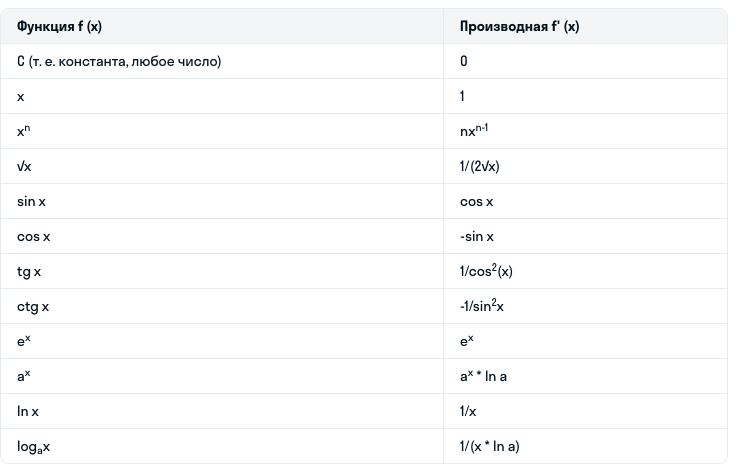

### Алгоритм нахождения наибольшего и наименьшего значения непрерывной функции на отрезке
Как определить наибольшее и наименьшее значения функции на отрезке?

        Найдём область определения данной функции и проверим, входит ли в неё заданный отрезок.

        Найдём производную данной функции.

        Приравняем производную к нулю и найдём точки, в которых она обращается в нуль (решим уравнение).

        Выберем из корней уравнения те точки, которые попадают в заданный промежуток, и вычислим значение функции в них.

        Возьмём точки начала и конца отрезка и найдём значение функции в них.

        Сделаем вывод о наибольшем и наименьшем значении функции. 

https://skysmart.ru/articles/mathematic/nahozhdeniya-naibolshego-i-naimenshego-znacheniya-funkcii

In [282]:
from sympy import *
import numpy as np
x = Symbol('x')
y = x**2 + x*4              # здесь задаем функцию
yprime = y.diff(x)          # здесь вычисляем ее производную из библиотеки sympy
print(yprime)           

f_diff = lambdify(x, yprime, 'numpy')    # здесь задаем порядоек работы функции со значениями x + указываем вид последовательности
x_seq = np.array([-3,-2,-1,0,1,2,3,4])        # здесь задаем отрезок значений аргумента (например на отрезке [0,4])
print(f'Значения Х ..................{x_seq}')
#print(f'Значения функции на концах отрезка [{}, {}]')
print(f'Значения производной функции {f_diff(x_seq)}')    # здесь получаем массив значений производной функции на этом отрезке

for ind, x in enumerate(x_seq):
    if f_diff(x_seq)[ind] == 0: print('производная равна 0 при х = ', x)



2*x + 4
Значения Х ..................[-3 -2 -1  0  1  2  3  4]
Значения производной функции [-2  0  2  4  6  8 10 12]
производная равна 0 при х =  -2


In [280]:
from sympy import *
import numpy as np
x = Symbol('x')
y = x**2 + x*4 

f_orig = lambdify(x, y, 'numpy')

f_orig(np.array([-1,5]))

array([-3, 45])

In [283]:
from sympy import *
import numpy as np
x = Symbol('x')
y = x**2 + x*4              # здесь задаем функцию
yprime = y.diff(x)          # здесь вычисляем ее производную из библиотеки sympy
print(yprime)

x=2
print(y)

2*x + 4
x**2 + 4*x
